In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

try:
    import pynmrstar
except:
    print("You have to install the package `pynmrstar` first. Use `conda install pynmrstar` or `pip install pynmrstar` command in your terminal (conda or cmd in Windows)")
#import plotly.express as px

In [2]:
try:
    bmrb_id = int(input("Enter the BMRB ID \n For example, 51228 for Alex's SH3 assignments "))
    nmrstar = pynmrstar.Entry.from_database(bmrb_id)

except ValueError:
    print("Not a number")
except OSError:
    print(f"Entry {bmrb_id} does not exist in the public database")
    
nmrstar = pynmrstar.Entry.from_database(bmrb_id)
loops = nmrstar.get_saveframes_by_category('assigned_chemical_shifts')[0]
shifts = loops['_Atom_chem_shift']

## print(shifts)

data = StringIO(shifts.get_data_as_csv().replace("_Atom_chem_shift.", ""))
df = pd.read_csv(data, index_col=0)
## print(df.columns)
df.tail()

Enter the BMRB ID 
 For example, 51228 for Alex's SH3 assignments 51228


,Assembly_atom_ID,Entity_assembly_ID,Entity_assembly_asym_ID,Entity_ID,Comp_index_ID,Seq_ID,Comp_ID,Atom_ID,Atom_type,Atom_isotope_number,...,Occupancy,Resonance_ID,Auth_entity_assembly_ID,Auth_asym_ID,Auth_seq_ID,Auth_comp_ID,Auth_atom_ID,Details,Entry_ID,Assigned_chem_shift_list_ID
ID,,,,,,,,,,,,,,,,,,,,,
559,.,1,.,1,61,61,LEU,N,N,15,...,.,.,.,.,61,LEU,N,.,51228,1
560,.,1,.,1,62,62,ASP,H,H,1,...,.,.,.,.,62,ASP,H,.,51228,1
561,.,1,.,1,62,62,ASP,CA,C,13,...,.,.,.,.,62,ASP,CA,.,51228,1
562,.,1,.,1,62,62,ASP,CB,C,13,...,.,.,.,.,62,ASP,CB,.,51228,1
563,.,1,.,1,62,62,ASP,N,N,15,...,.,.,.,.,62,ASP,N,.,51228,1


In [3]:
df1 = df["Seq_ID Comp_ID Atom_ID Val Val_err Ambiguity_code".split()].set_index("Seq_ID Comp_ID Atom_ID".split())
df1.columns = "ChemShift CS_error Ambiguity".split()
df1

ChemShift  CS_error  Ambiguity
Seq_ID Comp_ID Atom_ID                                
7      GLU     C          174.762       0.0          1
8      LEU     H            8.124       0.0          1
               HA           5.423       0.0          1
               HB2          1.593       0.0          2
               HB3          1.241       0.0          2
...                           ...       ...        ...
61     LEU     N          126.029       0.0          1
62     ASP     H            8.130       0.0          1
               CA          56.035       0.0          1
               CB          42.232       0.0          1
               N          128.458       0.0          1

[563 rows x 3 columns]

Which dimension to plot along X? 
 Hint: H N C CA CB HA
CA

Which dimension to plot along Y? 
 Hint: H N C CA CB HA
CB


<AxesSubplot:xlabel='ChemShift_CA', ylabel='ChemShift_CB'>

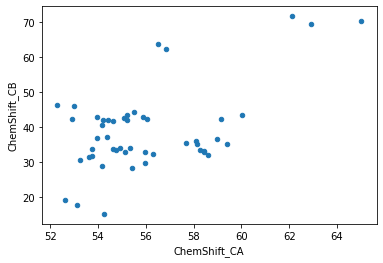

In [6]:
## Visualisation
dimX = input("Which dimension to plot along X? \n Hint: H N C CA CB HA\n")
print()
if dimX not in ("H N C CA CB HA".split()):
    dimX = "H"
dimY = input("Which dimension to plot along Y? \n Hint: H N C CA CB HA\n")
if dimY not in ("H N C CA CB HA".split()):
    dimY = "N"

x = df1["ChemShift"].loc[:, :, dimX]
y = df1["ChemShift"].loc[:, :, dimY]

df_2D = pd.merge(x, y, on="Seq_ID", suffixes = (f'_{dimX}', f'_{dimY}'))
df_2D.plot(x=f"ChemShift_{dimX}", y=f"ChemShift_{dimY}", kind="scatter")

In [8]:
fig = df_2D.plot(x=f"ChemShift_{dimX}", y=f"ChemShift_{dimY}", kind="scatter", 
                 backend="plotly", text=df_2D.index,
          )

fig.update_xaxes(
    autorange="reversed")
fig.update_yaxes(
    autorange="reversed")
fig.update_traces(textposition='top left')